#### Project Type: Тестовое задане на вакансию Data Scientist в Лабораторию функциональной нейрофизиологии
### Project Number: 0010
## Project Title: Калибровка газоанализатора

---


# **STAGE 1. PROBLEM DEFINITION**
    




### Project Objectives

---

#### Описание проекта 

В рамках пилотного проекта с производителем медицинского оборудования нам предложили попробовать воспользоваться оборудованием, предназначенным для анализа респираторной системы.

Данный девайс анализирует дыхание напрямую, т.к. крепится непосредственно к голове, чем может выгодно отличаться от нашего оборудования (Bitalino), которое крепится к груди и анализирует дыхание косвенно, через сигнал от соответствующих мышц.

Для сравнения и сопоставления точности двух девайсов (которые измеряют одну и ту же величину) мы надели их на одного человека и заставили его совершать три различных вида физической активности, которые суммарно длились около 15 минут (примерно по пять минут на активность). 

- _Сигналы с разных устройств смещены по времени_. 

#### Цель

__Обработать и проанализировать предоставленные данные и сделать вывод об их связи и возможности восстановления одного потока данных из другого.__


### Success criteria

---

1. Визуализируйте показатели частоты дыхания, полученные с обоих девайсов. Что нужно сделать для калибровки обоих сигналов по времени?

2. Сделайте вывод о связи сигналов во время различных активностей. Какие причины могут привести к несоответствию сигналов? Можно ли восстановить один поток из другого?

**Целевая переменная:** Частота дыхания

### Termenology

---

- Анализатор респираторной системы 
    - Тип 1: Bitalino
    - Тип 2: Respiration

### Task type

---

- Разведочный анализ данных 
- Визуализация данных

    
# **STAGE 2. PRELIMINARY DATA WRANGLING**



### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
data_path = r'D:/Data_Science_Project/7. Test task/[0010] Project 1 - Лаборатория функциональной нейрофизиологии/Task#2/'

## SECTION 2.1.  DATA UNDERSTANDING

### _Collect initial data_

---

In [3]:
# Загрузка исходного набора данных:  bitalino_data
bitalino_data = pd.read_csv(data_path + '/bitalino_data.txt', sep ='	', skiprows = 3, names=["nSeq","I1","I2","O1","O2","A1","A2"])

# Проверка результата
bitalino_data.head()

,nSeq,I1,I2,O1,O2,A1,A2
0,0,1,1,0,0,457,506
1,1,1,1,0,0,457,507
2,2,1,1,0,0,457,507
3,3,1,1,0,0,457,508
4,4,1,1,0,0,457,508


Данные, представленные в исходном наборе, были подвергнуты предварительной подготовке в MS Excel.

- Импорт данных из исходного файла respiration_data.txt 
- Удаление заголовка 
- Удаление единиц измерения 
- Сохранение результатов в файл respiration_data.csv

In [4]:
# Загрузка исходного набора данных: respiration_data
respiration_data = pd.read_csv(data_path + '/respiration_data.csv', sep=';')

# Проверка результата
respiration_data.head().T

,0,1,2,3,4
Время,0:00:04,0:00:08,0:00:11,0:00:15,0:00:19
VT (BTPS),0.69,0.68,0.66,0.64,0.64
ЧД,20.5,18.9,17,15.8,15.5
V'E (BTPS),14.1,12.9,11.3,10.1,9.9
V'max (BTPS),0.65,0.64,0.6,0.57,0.54
FEetO2,13.97,14.02,14.09,14.08,13.97
FEetCO2,5.89,5.84,5.74,5.69,5.72
PetO2,95.4,95.7,96.2,96.1,95.4
PetCO2,40.2,39.8,39.2,38.9,39
V'O2 (STPD),0.464,0.41,0.323,0.249,0.239


### _Describe data_

---

#### bitalino_data

Исходный файл bitalino_data.txt содержит данные в формате OpenSignalsReader. Первый канал соответствует показателям активности мышц грудной клетки, второй - ЭКГ.

**Переменные в наборе**
- nSeq
- I1
- I2
- O1
- O2
- A1
- A2

**Данные заголовка исходного файла**

- "20:18:06:13:02:24"
- "sensor":["RAW","RAW"]
- "device name":"20:18:06:13:02:24"
- "column":["nSeq","I1","I2","O1","O2","A1","A2"]
- "sync interval":2
- "time":"12:24:53"
- "comments":""
- "device connection":"BTH20:18:06:13:02:24"
- "channels":[1,2]
- "date":"2019-11-02"
- "mode":0
- "digital IO":[0,0,1,1]
- "firmware version":"0"
- "device":"bitalino_rev"
- "position":0
- "sampling rate":1000
- "label":["A1","A2"]
- "resolution":[10,10]
- "special":[{},{}]}



#### respiration_data

- Исходный файл respiration_data.txt содержит данные газоанализатора в табличном формате с расширенным заголовком. 
- Нас интересует показатель частоты дыхания (ЧД, она же RR - respiration rate).

**Переменные в наборе**
- **Время** - [h:mm:ss]
- **VT (BTPS)** - [л]      
- **ЧД** - [1/мин]    
- **V'E (BTPS)** - [л/мин] 
- **V'max (BTPS)** - [л/с]
- **FEetO2** - [Об %]  
- **FEetCO2** - [Об %]  
- **PetO2** - [ммРтст]    
- **PetCO2** - [ммРтст]    
- **V'O2 (STPD)** - [л/мин] 
- **V'CO2 (STPD)** - [л/мин]
- **RER** 
- **V'O2/кг** - [мл/мин/кг]  
- **METS** 
- **V'E/V'O2**
- **V'E/V'CO2**
- **VD/VT**
- **ЧСС** - [1/мин]
- **Q'** - [л/мин] 
- **SV**  - [мл]  
- **La** - [ммоль/л] 
- **Вт** - [ккал]  
- **EE** - [ккал/д]
- **EE/кг** - [ккал/д/кг] 
- **CHO** - [г/ч]    
- **ЖИР** - [г/ч]    
- **EFF** - [%]   
- **BR** - [%]   
- **V'O2/kg_Lean** - [мл/мин/кг] 
- **EE/kg_Lean** - [ккал/д/кг]
- **BR**  

**Полезные данные заголовка исходного файла**

- Время запуска	02.11.2019. 12:29:13
- Время завершения	02.11.2019. 12:47:07
- Продолжительность	0:17:53
- Концентрация O2 перед запуском	0
- Концентрация CO2 перед запуском	0
- Температура перед запуском	23.5
- Комментарий	
- Тип прибора	MetaLyzer 3B - R2
- Серийный № прибора	88880000
- Версия прошивки прибора	2.7.99
- Протокол нагрузки	

- Время АП	0:13:22
- Время АП - 1 минута	0:12:22
- МПК [л/мин]	1.967
- V'E/V'CO2-наклон	23.71
- Время ТРК	0:16:08

## SECTION 2.2 DATA PREPARATION

### _Renaming_

---

In [5]:
# Приведём название переменных в наборе bitalino_data к виду принятому в анализе 
bitalino_data.columns = [i.replace(' ', '_').lower() for i in bitalino_data.columns]

# Проверка результата 
bitalino_data.head(1)

,nseq,i1,i2,o1,o2,a1,a2
0,0,1,1,0,0,457,506


In [6]:
# Приведём название переменных в наборе respiration_data к виду принятому в анализе 
respiration_data.columns = [i.strip().replace(' ', '_').lower() for i in respiration_data.columns]

# Проверка результата 
respiration_data.head().T

,0,1,2,3,4
время,0:00:04,0:00:08,0:00:11,0:00:15,0:00:19
vt_(btps),0.69,0.68,0.66,0.64,0.64
чд,20.5,18.9,17,15.8,15.5
v'e_(btps),14.1,12.9,11.3,10.1,9.9
v'max_(btps),0.65,0.64,0.6,0.57,0.54
feeto2,13.97,14.02,14.09,14.08,13.97
feetco2,5.89,5.84,5.74,5.69,5.72
peto2,95.4,95.7,96.2,96.1,95.4
petco2,40.2,39.8,39.2,38.9,39
v'o2_(stpd),0.464,0.41,0.323,0.249,0.239


In [7]:
# Список переменных
respiration_data.columns.tolist()

['время',
 'vt_(btps)',
 'чд',
 "v'e_(btps)",
 "v'max_(btps)",
 'feeto2',
 'feetco2',
 'peto2',
 'petco2',
 "v'o2_(stpd)",
 "v'co2_(stpd)",
 'rer(коэффици...',
 "v'o2/кг",
 'mets',
 "v'e/v'o2",
 "v'e/v'co2",
 'vd/vt',
 'чсс',
 "q'",
 'sv',
 'la',
 'вт',
 'ee',
 'ee/кг',
 'cho',
 'жир',
 'eff',
 'br',
 "v'o2/kg_lean",
 'ee/kg_lean',
 'br']

In [8]:
# Cловарь переменных
list_of_variables = {'время': 'time',
                     'vt_(btps)' : 'vt_(btps)',
                     'чд': 'rr',
                     "v'e_(btps)" : "v'e_(btps)",
                     "v'max_(btps)" : "v'max_(btps)",
                     'feeto2' : 'feeto2',
                     'feetco2' : 'feetco2',
                     'peto2' : 'peto2',
                     'petco2' : 'petco2',
                     "v'o2_(stpd)" :"v'o2_(stpd)" ,
                     "v'co2_(stpd)" :"v'co2_(stpd)" ,
                     'rer(коэффици...' : 'rer',
                     "v'o2/кг" :  "v'o2/kg",
                     'mets' : 'mets',
                     "v'e/v'o2" :  "v'e/v'o2",
                     "v'e/v'co2" :"v'e/v'co2" ,
                     'vd/vt' : 'vd/vt',
                     'чсс': 'hr',
                     "q'" : "q'",
                     'sv' :'sv' ,
                     'la' :'la' ,
                     'вт' : 'w',
                     'ee' : 'ee',
                     'ee/кг' :'ee/kg' ,
                     'cho' : 'cho',
                     'жир' : 'fat',
                     'eff' :'eff' ,
                     'br' : 'br_percent',
                     "v'o2/kg_lean" :"v'o2/kg_lean" ,
                     'ee/kg_lean' :'ee/kg_lean' ,
                     'br' : 'br'} 

In [9]:
# Переобозначим переменные 
respiration_data = respiration_data.rename(columns = list_of_variables)

# Проверка результата
respiration_data.head().T

,0,1,2,3,4
time,0:00:04,0:00:08,0:00:11,0:00:15,0:00:19
vt_(btps),0.69,0.68,0.66,0.64,0.64
rr,20.5,18.9,17,15.8,15.5
v'e_(btps),14.1,12.9,11.3,10.1,9.9
v'max_(btps),0.65,0.64,0.6,0.57,0.54
feeto2,13.97,14.02,14.09,14.08,13.97
feetco2,5.89,5.84,5.74,5.69,5.72
peto2,95.4,95.7,96.2,96.1,95.4
petco2,40.2,39.8,39.2,38.9,39
v'o2_(stpd),0.464,0.41,0.323,0.249,0.239


### _Verify data quality_

---

In [10]:
def verify_data_quality(evaluated_dataset):
    '''
    ФУНКЦИЯ КОМПЛЕКСНОЙ ОЦЕНКИ КАЧЕСТВА ДАННЫХ
    '''
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 50+ '\n')
   
    # Проверка наличия значений NaN
    print("Общее количество пропущенных значений:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 50+ '\n')
    
    evaluated_dataset.isnull().sum().plot(kind='bar')
    # Add a title and show the plot.
    plt.title('Распределение пропущенных значений по столбцам')
    # Create tick mark labels on the Y axis and rotate them.
    plt.xticks(rotation = 90)
    # Create X axis label.
    plt.xlabel("Columns")
    # Create Y axis label.
    plt.ylabel("NaN Values");
    
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 50+ '\n')
    
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 50+ '\n')
    
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 50+ '\n')
   
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 50+ '\n')

Типы данных:
nseq    int64
i1      int64
i2      int64
o1      int64
o2      int64
a1      int64
a2      int64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
7260589
__________________________________________________

Дублирующих строк:
907036
__________________________________________________

Форма нарбора данных:
(1037227, 7)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=1037227, step=1)
__________________________________________________



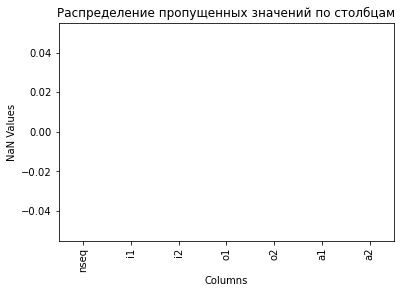

In [11]:
# Оценка качества данных bitalino_data
verify_data_quality(bitalino_data)

Типы данных:
time             object
vt_(btps)       float64
rr              float64
v'e_(btps)      float64
v'max_(btps)    float64
feeto2          float64
feetco2         float64
peto2           float64
petco2          float64
v'o2_(stpd)     float64
v'co2_(stpd)    float64
rer             float64
v'o2/kg           int64
mets            float64
v'e/v'o2        float64
v'e/v'co2       float64
vd/vt           float64
hr               object
q'              float64
sv               object
la               object
w                 int64
ee                int64
ee/kg             int64
cho               int64
fat               int64
eff              object
br                int64
v'o2/kg_lean      int64
ee/kg_lean        int64
br                int64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
10075
________________________________________

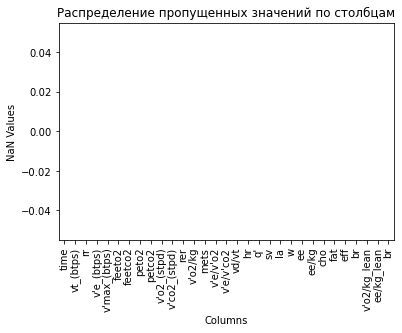

In [12]:
# Оценка качества данных respiration_data
verify_data_quality(respiration_data)

##### Анализ данных типа objec

In [13]:
respiration_data[['sv', 'la', 'eff']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sv      325 non-null    object
 1   la      325 non-null    object
 2   eff     325 non-null    object
dtypes: object(3)
memory usage: 7.7+ KB


In [14]:
respiration_data['sv'].unique()

array(['               '], dtype=object)

In [15]:
respiration_data['la'].unique()

array(['               '], dtype=object)

In [16]:
respiration_data['eff'].unique()

array(['               '], dtype=object)

__Вывод:__ Все объекты типа object, кроме переменной время пустые. 

### _Data type conversions_

---

In [17]:
# Преобразование даты 
respiration_data['time'] = pd.to_datetime(respiration_data['time']).dt.time
# Проверка результата
respiration_data.dtypes

time             object
vt_(btps)       float64
rr              float64
v'e_(btps)      float64
v'max_(btps)    float64
feeto2          float64
feetco2         float64
peto2           float64
petco2          float64
v'o2_(stpd)     float64
v'co2_(stpd)    float64
rer             float64
v'o2/kg           int64
mets            float64
v'e/v'o2        float64
v'e/v'co2       float64
vd/vt           float64
hr               object
q'              float64
sv               object
la               object
w                 int64
ee                int64
ee/kg             int64
cho               int64
fat               int64
eff              object
br                int64
v'o2/kg_lean      int64
ee/kg_lean        int64
br                int64
dtype: object

### _Sorting, reordering, reindexing_

---

In [18]:
 # Выполним переиндексацию по переменной время 
respiration_data = respiration_data.set_index('time')
# Проверка резльтата 
respiration_data.head().T

time,00:00:04,00:00:08,00:00:11,00:00:15,00:00:19
vt_(btps),0.69,0.68,0.66,0.64,0.64
rr,20.5,18.9,17,15.8,15.5
v'e_(btps),14.1,12.9,11.3,10.1,9.9
v'max_(btps),0.65,0.64,0.6,0.57,0.54
feeto2,13.97,14.02,14.09,14.08,13.97
feetco2,5.89,5.84,5.74,5.69,5.72
peto2,95.4,95.7,96.2,96.1,95.4
petco2,40.2,39.8,39.2,38.9,39
v'o2_(stpd),0.464,0.41,0.323,0.249,0.239
v'co2_(stpd),0.454,0.403,0.319,0.247,0.234


### _Conclusions_

---

In [19]:
# Сохраниение промежуточны результатов дальнейшего анализа

# bitalino_data
pd.DataFrame.to_feather(bitalino_data, 'bitalino_data.file')


# Данные по сложности
respiration_data.to_csv('respiration_data_prep.csv', sep=',', index=True, encoding='utf-8')
